# Project: Movie Data Sheet Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
I will be working with the data sheet tmdb-movies.csv. This data contains information about over 10,000 movies collected from TMDb. This includes data about how much was spent to make the movies and how much they made. Additional information about who was in the movie, how highly rated the movie was, and who directed the movie are also included.



### Question(s) for Analysis
Given the high volume of information in this data related to the financials behind the movies and how far back the data goes, it would be good to investigate questions related to this. My first question is have movie budgets gone up over time. This is something I've always assumed to be true and seeing the numbers behind it would be interesting. The next question will expand on that, how have the changes in movie budgets over the years affected revenue. Making sure to take into account everything, I will also investigate how this is affected when we adjust for inflation and if the rating of movies have gone up with the assumed increasing budget. When taking a look at these questions the values will be measured by looking at the change over the release years.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot  as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

First, I will load in the data and look at a small sample of it to ensure it has loaded in correctly.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


It looks like all of the data is loaded in. So let's get a better idea of how much I have.

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

This tells me how many rows are null and what type of data each row contains. Now I can begin cleaning this data.


### Data Cleaning

It looks like several columns are missing data. Upon investigation of these columns, they appear to be unneeded for answering our questions. To avoid them having any effect on the data I will drop them.

In [5]:
df.drop(['overview','genres','tagline','homepage','director','cast','production_companies','keywords','imdb_id'], axis=1, inplace=True)

Now, to double check that all of the data remaining is filled out I'll check thge df.info again. Expecting all columns to read as 10866.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1018.8+ KB


Lastly for data cleaning, I want to ensure all of the data I'm going to use for budget and revenue are logical and complete. To do this I will check the minimum and maximum of these values.

In [7]:
round(df.revenue.max())

2781505847

In [8]:
round(df.revenue.min())

0

In [9]:
round(df.budget.min())

0

In [10]:
round(df.budget.max())

425000000

 It looks like some of the movies in this data had no data recorded in the budget or revenue sections. This can effect the results I get when taking averages. While unfortunate the best option to make sure this doesn't effect my conclustions is to drop these rows.

In [11]:
df= df[df['budget'] != 0]
df= df[df['revenue'] != 0]

Now to check how our data set was effected.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 12 columns):
id                3855 non-null int64
popularity        3855 non-null float64
budget            3855 non-null int64
revenue           3855 non-null int64
original_title    3855 non-null object
runtime           3855 non-null int64
release_date      3855 non-null object
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 391.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Have Movie budgets increased over time?

 The first thing I want to look at is simply the average budget for movies made in the last 15 years against movies older than 15 years.

In [13]:
new = df.release_year >= 2005
old = df.release_year < 2005

In [14]:
round(df.budget[new].mean())

44177693.0

In [15]:
round(df.budget[old].mean())

30568403.0

This seems to show that the average has gone up, but one number doesn’t provide as much info as I would like. Next, I want to look at these figures plotted against each other.

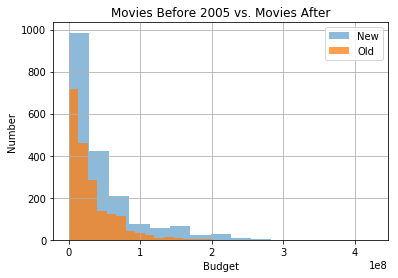

In [16]:
newhist = df.budget[new].hist(alpha=0.50,bins=15, Label='New')
oldhist = df.budget[old].hist(alpha=0.75,bins=15, Label='Old')
newhist.set_title('Movies Before 2005 vs. Movies After')
newhist.set_ylabel('Number')
newhist.set_xlabel('Budget')
plt.legend();

This graph looks good and appears to show significantly more budget for newer movies, however, 15 years is a pretty random timeframe to group by newer versus older movies. I want to look at this data as a whole, so my next step is to use a describe to look at the actual numbers behind the budget.

In [17]:
pd.DataFrame(df['budget'].describe())

,budget
count,3.855000e+03
mean,3.720183e+07
std,4.220291e+07
min,1.000000e+00
25%,1.000000e+07
50%,2.400000e+07
75%,5.000000e+07
max,4.250000e+08


The numbers here are helpful but what I really want to see is how they have changed over the years. To take a look at this I will create a scatter plot of the budget over each year.

Text(0,0.5,'Budget')

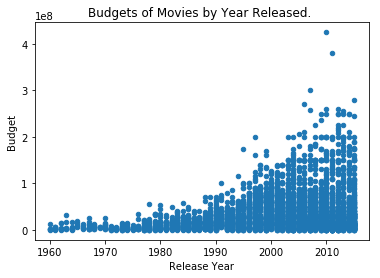

In [18]:
budgetchart = df.plot(kind='scatter',y='budget',x='release_year',title='Budgets of Movies by Year Released. ')
budgetchart.set_xlabel("Release Year")
budgetchart.set_ylabel("Budget")

This is better and appears to show a similar trend to the first chart we looked at, but now there is a new issue. There is so much data that a scatter plot is much too busy to make concrete conclusions from. So now I want to graph the changing average budgets of every year. To see which trends are forming

First, I will create a function that will allow me to create various charts grouped by the release year.

In [19]:
df.sort_values(by=['release_year'], inplace=True)
def plot_new_col(avg_by,var_name,chart_title):
    #defining a function to group a column by release year, average it and plot the data with labels and a title.
    df[var_name]=df.groupby("release_year")[avg_by].transform('mean')
    plottedChart = df.plot(y=var_name,x='release_year',title = chart_title)
    plottedChart.set_xlabel("Release Year")
    plottedChart.set_ylabel(avg_by)

Now, I can call my function to quickly create custom charts based on release year. For this one, I will chart by budget.

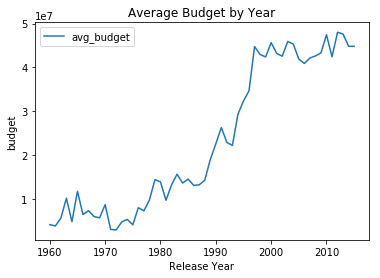

In [20]:
plot_new_col('budget','avg_budget','Average Budget by Year')

This is exactly what I was looking for, and even shows some surprising things I was not expecting. Mainly that it appears the budgets have mostly stopped increasing since the 2000s. This does not tell the whole story however, one thing to account for in this is inflation. To make sure this does not affect our findings I next want to look at these numbers when adjusting for inflation.

In [21]:
pd.DataFrame(df['budget_adj'].describe())

,budget_adj
count,3.855000e+03
mean,4.423630e+07
std,4.480403e+07
min,9.693980e-01
25%,1.309053e+07
50%,3.001558e+07
75%,6.061307e+07
max,4.250000e+08


Looking at the numbers here compared to the unadjusted description shows a few things. Adjusting for inflation has raised every metric except the max and count. This leads me to believe that if I were to graph it the same as the unadjusted numbers, I would get very different results. So, I will check that now.

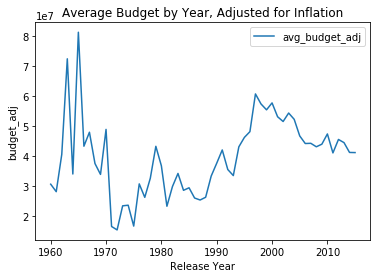

In [22]:
plot_new_col('budget_adj','avg_budget_adj','Average Budget by Year, Adjusted for Inflation')

This graph is exactly what I need to answer my question. When inflation is accounted for the budgets are much more variable than it would look, and while there was steady growth from the 1980s up to the late 1990s it has actually begun to shrink rather significantly. This data is great so now I will follow up on it and see the effect budget has had.

### Have the changes in budget affected the revenue and ratings of movies?
The first thing to look at here is, like last time, the numbers behind the revenue.

In [23]:
pd.DataFrame(df['revenue'].describe())

,revenue
count,3.855000e+03
mean,1.076589e+08
std,1.765248e+08
min,2.000000e+00
25%,1.357645e+07
50%,4.479322e+07
75%,1.241530e+08
max,2.781506e+09


With these numbers in mind, next I want to look at same type of graph we used to identify trends in budget. Since I know this graph was able to be used to identify trends in the budget, it should be useful with revenue as well. 

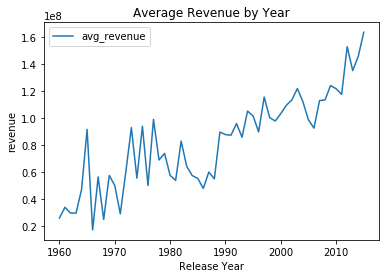

In [24]:
plot_new_col('revenue','avg_revenue','Average Revenue by Year')

The graph shows that revenue has been trending upwards steadily since the late 1980s, with no significant loss since the budgets stopped rising. Next, I want to look at the numbers for revenue when adjusting for inflation.

In [25]:
pd.DataFrame(df['revenue_adj'].describe())

,revenue_adj
count,3.855000e+03
mean,1.370294e+08
std,2.160944e+08
min,2.370705e+00
25%,1.834123e+07
50%,6.171861e+07
75%,1.632401e+08
max,2.827124e+09


Adjusting for inflation here seems to have had a very similar effect as it had on budget. Meaning this has also likely had an effect on the trends seen. To get a better idea of how I will now use my function to look at these numbers averaged by year.

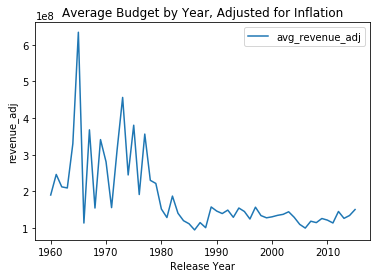

In [26]:
plot_new_col('revenue_adj','avg_revenue_adj','Average Budget by Year, Adjusted for Inflation')

This graph shows that revenue has actually been pretty stable since the 1990s, with little effect shown from the changes in budget.

Another metric that could help explain the budget and revenue changes would be the quality of the movies. Changing quality of movies could affect how many people are wanting to see the movie. First, I want to see how these votes break into buckets to see which are most common.

Text(0.5,0,'Average vote')

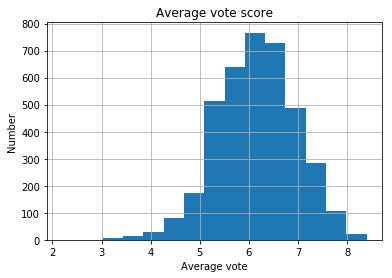

In [27]:
voteAvg = df.vote_average.hist(bins=15)
voteAvg.set_title('Average vote score')
voteAvg.set_ylabel('Number')
voteAvg.set_xlabel('Average vote')

This graph shows a pretty standard gaussian distribution, with the most common rating being just above a 6. Now, I want to look at how these averages have changed over the years.

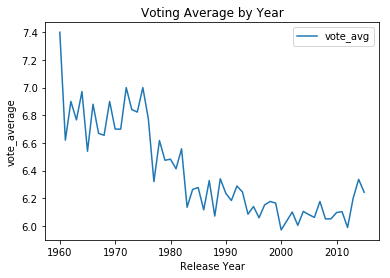

In [28]:
plot_new_col('vote_average','vote_avg','Voting Average by Year')

Next, another statistic to keep in mind when examining this is the overall number of movies made each year. Since we are taking the average each year the number of movies that year has an effect on our data.

In [29]:
df.groupby(['release_year'])[['id']].count()

,id
release_year,
1960,5
1961,10
1962,7
1963,6
1964,7
1965,5
1966,5
1967,13
1968,9


Having a way to visulize this would be helpful as well.

Text(0,0.5,'Number of Movies')

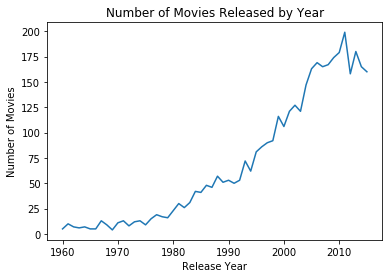

In [30]:
moviecount = df.groupby('release_year').size().plot(title="Number of Movies Released by Year")
moviecount.set_xlabel("Release Year")
moviecount.set_ylabel("Number of Movies")

The data and graph here show that the number of movies has been steadily increasing, this could influence my averages. The last two things I want to look at are direct comparisons between revenue and budget on the same graph. Both adjusted and unadjusted. The best way I have found to do this is to separate these two data points into their own data frames to plot together.

Text(0,0.5,'Dollars')

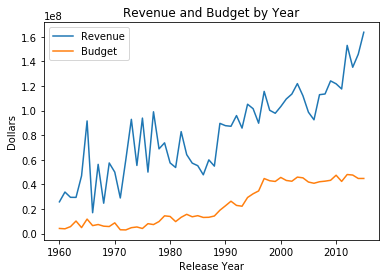

In [31]:
#convert needed columns into arrays
arr = df.release_year.unique()
arr2 = df.avg_revenue.unique()
arr3 = df.avg_budget.unique()
#convert arrays into lists
list1 = arr.tolist()
list2 = arr2.tolist()
list3 = arr3.tolist()
#combine lists into lists of lists
comb_lst = [list(x) for x in zip(list1, list2, list3)]
#pass list of lists into dataframe
df2 = pd.DataFrame(comb_lst, columns = ['Year', 'Revenue','Budget'])
#sort and plot
df2.sort_values(by=['Year'], inplace=True)
compChar1 = df2.plot(x='Year',title='Revenue and Budget by Year')
compChar1.set_xlabel("Release Year")
compChar1.set_ylabel('Dollars')

This graph appears to show a weak correlation between revenue and budget. With both having a slow trend upwards. Next, I want to chart the same thing wen adjusting for inflation. Based on previous charts I expect this to heavily change what kind of trends I can see.

Text(0,0.5,'Dollars Adjusted')

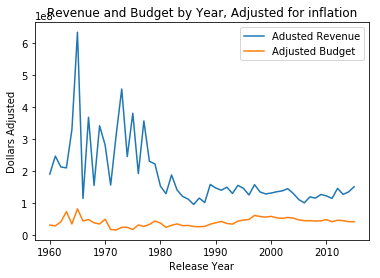

In [32]:
#convert needed columns into arrays
arr4 = df.release_year.unique()
arr5 = df.avg_revenue_adj.unique()
arr6 = df.avg_budget_adj.unique()
#convert arrays into lists
list4 = arr4.tolist()
list5 = arr5.tolist()
list6 = arr6.tolist()
#combine lists into lists of lists
comb_lst = [list(x) for x in zip(list4, list5, list6)]
#pass list of lists into dataframe
df3 = pd.DataFrame(comb_lst, columns = ['Year', 'Adusted Revenue','Adjusted Budget'])
#sort and plot
df3.sort_values(by=['Year'], inplace=True)
compChar2 = df3.plot(x='Year',title='Revenue and Budget by Year, Adjusted for inflation')
compChar2.set_xlabel("Release Year")
compChar2.set_ylabel('Dollars Adjusted')


As expected, the previous upward trends are now mostly gone. Instead since the 1990s both have been relatively stable.

<a id='conclusions'></a>
## Conclusions

My first question was have movie budgets gone up over time? The answer to this is, it depends on if inflation is adjusted for. When adjusting for inflation the budgets since the mid-1990s have been steadily decreasing while actually peaking in the mid-1960s. However, looking at just the dollar amount with no inflation the budgets have continuously increased right up to the 2000s, and only stopped growing then. 

The second question was, have the changes in budget affected the revenue and ratings of movies? The answer to this is less clear. The adjusted revenues have not recovered since the unpredictable years before the 1980s and since becoming more predictable there have been no significant trends. Once again when looking at the unadjusted values the picture seems to look like a pretty clear upward trend, but this is mostly explained by inflation. The ratings have been on a steady decline despite the increases in budgets in the mid-1990s while the number of movies made each year has increased massively. It’s hard to say conclusively what effect the budget specifically has had on these metrics.

### Limitation
The conclusions here are limited due to a lack of strong correlations and no causal links being found. When I began exploring this data I expected to find much stronger correlations between the budget of the movies and the revenue, and while some general trends were visible it's not possible to say which caused the other. Or even if the correlations were strong enough in the first place. Additionally, the only metric to judge movie quality is subjective and could be heavily influenced by things such as survivorship bias. 

The other big limitation is the number of movies that had to be left out because of missing data. It's most likely that they would've followed similar trends to the rest of the data set but it's possible they would've changed the trends in one way or another.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer

> Is there an easier method to plot the budget and revenue side by side in a line chart without plotting the remaining columns? Every other method I tried ended up having the graph look completely unusable.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0